# On the Polynomial Observer for Nonlinear Systems

<p style="font-size:16px">
    This work proposes a novel <b>polynomial observable method</b> to approximate nonlinear systems with complex dynamics using a <i>data-driven decomposition approach</i>. 
    The main contribution relies on providing an <b>accurate polynomial approximation</b> to devise a <b>state observer</b>, whose design may follow as usual.
    Our method employs an <b>LMI condition</b> within the polynomial framework to calculate the bounding limit. <br><br>
    The proposed method is evaluated in two distinct scenarios: a <b>reservoir systeml</b> with a single-state (<b>x -> liquid level</b>) system and an <b>undamped pendulum</b>  with two states (<b>x1 -> angular displacemnt</b> and <b>x2->angular velocity</b>).
</p>

<p style="font-size:16px">
    The architecture of an observer becomes cumbersome in the control loop when the state is unavailable for measurement.
    Typically, such a situation occurs due to physical constraints and economic limitations that make cost-prohibitive sensor deployment. 
    Additionally, highly complex system models can make it challenging to explicitly represent the state of the system.
    Within this context, a polynomial approach is proposed herein to model the system whose data set is compatible with:
</p>


\begin{align}
    U_0 &\coloneqq \left[u_d(0) \ u_d(\tau_s) \ \dots \ u_d((T-1)\tau_s)\right] \tag{3} \\
    X_0 &\coloneqq \left[x_d(0) \ x_d(\tau_s) \ \dots \ x_d((T-1)\tau_s)\right] \tag{4} \\
    X_1 &\coloneqq \left[x_d(\tau_s) \ x_d(2\tau_s) \ \dots \ x_d(T\tau_s) \right] \tag{5}
\end{align}


<p style="font-size:16px"> 
    The goal is to obtain a polynomial representation of the system:
</p>

\begin{align}
x_{k+1} &= A Z(x_k) + B W(x_k) u_k \tag{2}
\end{align}

<p style="font-size:16px"> 
    Making it purely data-driven with no need for system dynamics knowledge.
    Indeed, the proposition is to adapt a polynomial approach to obtain a DMD-like poly- nomial decomposition [8], [11], [12].
</p>

<p style="font-size:16px">
   As a result, the Algorithm computes the matrices [B A] in a simple way using only the input and output data by choosing the desire set of polynomials.
</p>



**Algorithm: Bounds condition for evaluation criteria**

Let:

- $x \in \mathbb{R}^{n \times k}$
- $u \in \mathbb{R}^{m \times k}$

Steps:

1. $X_0 := x[0, n_t-1]$
2. $X_1 := x[1, n_t]$
3. $U := u[0, n_t-1]$
4. $Z(x) \in \mathcal{P}^{N \times 1}$
5. $W(x) \in \mathcal{P}^{p \times m}$
6. $Z_0 \Leftarrow Z(X_0)$
7. $W_0 \Leftarrow W(X_0) \cdot U$
8. $\begin{bmatrix}B & A\end{bmatrix} \Leftarrow X_1^\top \cdot \text{pinv}\left(\begin{bmatrix}W_0 \\ Z_0\end{bmatrix}\right)$
9. Find feasible $Q \in \mathbb{R}^{n \times n}$ such that:
    - $Q \preceq 0$
    - $\begin{bmatrix}B_a & A_a\end{bmatrix}^\top Q \begin{bmatrix}B_a & A_a\end{bmatrix} \preceq 0$
10. Compute $\sigma = |B_a^\top Q_1 B_a + A_a^\top Q_2 A_a|$






In [ ]:
## 📌 Execution Instructions

For details on how to emulate the individual codes:  
🔗 **Access the [README.md](README.md) file in this repository** which contains:

- 📋 Step-by-step guide for running all examples with the proposed polynomial estimator  
- ⚙️ Baseline EKF method configurations for comparison  
- 🛠️ Prerequisites and dependencies  
- 📊 Expected outputs

In [ ]:
# Working Example 1: Reservoir System
<p style="font-size:16px">
This frist aplication is focused on a a reservoir system comprising two water tanks. One of them is placed at 5 m above the ground, initially empty referred to as the upper tank. Another tank at ground level is initially filled with water. A pump is activated to transfer water from the lower tank to the upper one via a pipe connection. A second pipe connects the upper and lower tanks, allowing water to flow downwards due to
gravity. The manipulated variable is the signal sent to activate the water pump, and the measured variable is the water level in the upper tank. While this setup may seem straightforward, the upper tank has a conical shape, causing its cross-sectional area to change with height, for which the output ordinary differential equation is given by the equation:
</p>
$$
\frac{dh}{dt} =  \frac{k_i \omega - k_o\sqrt{h}}{\pi r^2 + \frac{2 \pi r h (r_L - r_S)}{H} + \frac{\pi h^2 (r_L - r_S)^2}{H^2}}
$$


#  Polynomial and EKF Model Execution
This section runs two modules:
1. **EKF (Extended Kalman Filter)** from `tank_EKF_example.py`
2. **Polynomial Model** from `tank_polynomial_example.py`

In [6]:
# Library imports
import importlib.util
import sys
import os

In [7]:
def import_python_module(module_name, file_path):
    """
    Imports a Python module from a given file path
    Args:
        module_name: name to give the module (e.g., 'ekf')
        file_path: absolute path to the .py file
    Returns:
        The imported module
    """
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    return module

In [8]:
# Set absolute paths to module files
ekf_path = os.path.abspath('tank_EKF_example.py')
polynomial_path = os.path.abspath('tank_polinomial_example.py')

Installed SDP solvers:  ['MOSEK', 'CVXOPT', 'SCS']
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+01  3e+00  3e+00  1e+00
 1:  0.0000e+00 -6.4231e-10  2e+00  6e-01  5e-01  2e-01
 2:  0.0000e+00 -7.7096e-10  7e-02  3e-02  2e-02  7e-03
 3:  0.0000e+00 -7.5999e-10  6e-03  4e-03  2e-03  6e-04
 4:  0.0000e+00 -7.4563e-10  5e-04  3e-03  2e-04  5e-05
 5:  0.0000e+00 -7.4880e-10  6e-06  1e-03  2e-06  6e-07
 6:  0.0000e+00 -7.4021e-10  2e-07  7e-03  5e-08  2e-08
 7:  0.0000e+00 -6.5530e-10  8e-09  3e-02  3e-09  1e-10
 8:  0.0000e+00 -3.1531e-10  1e-09  4e-03  1e-09  6e-13
 9:  0.0000e+00 -4.0693e-11  7e-11  7e-03  2e-10  8e-12
10:  0.0000e+00 -7.6996e-12  4e-12  3e-03  3e-11  7e-13
11:  0.0000e+00 -4.8772e-12  3e-12  2e-03  2e-11  3e-13
12:  0.0000e+00 -2.7841e-12  2e-12  1e-03  9e-12  6e-14
13:  0.0000e+00 -1.2112e-12  6e-13  1e-03  4e-12  1e-14
14:  0.0000e+00 -2.0228e-12  3e-12  3e-03  7e-12  4e-14
15:  0.0000e+00 -1.3348e-12  2e-12  6e-04  4e-12  1e-14

<IPython.core.display.Math object>

[[-6.92000000e-03 -3.99673278e+05]
 [ 3.99673280e+05 -5.40000000e-03]]
Installed SDP solvers:  ['MOSEK', 'CVXOPT', 'SCS']
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  8e+00  3e+00  3e+00  1e+00
 1:  0.0000e+00 -3.2286e-04  1e+00  4e-01  4e-01  1e-01
 2:  0.0000e+00 -4.8730e-04  2e-01  7e-02  7e-02  2e-02
 3:  0.0000e+00 -6.9481e-04  2e-02  8e-03  8e-03  2e-03
 4:  0.0000e+00 -3.9613e-04  2e-03  1e-03  1e-03  1e-05
 5:  0.0000e+00 -3.7288e-05  1e-04  2e-04  2e-04  2e-05
 6:  0.0000e+00 -7.2021e-06  1e-05  2e-05  2e-05  2e-06
 7:  0.0000e+00 -6.5621e-07  1e-06  2e-06  2e-06  6e-08
 8:  0.0000e+00 -4.3530e-07  1e-06  1e-06  1e-06  8e-08
 9:  0.0000e+00 -1.1223e-07  3e-07  4e-07  4e-07  2e-08
10:  0.0000e+00 -4.6368e-09  1e-08  4e-08  2e-08  8e-10
Optimal solution found.

 Residual norm 6.182795793423086e-11
cpusec: 0.01764
iter: 10
status: optimal
pinf: 0.0
dinf: 0.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

raio =  1071125.57658
0.006252152400348838
Erro Modelo DMDp: 0.01507546838918361
Erro Modelo DMDc: 0.16763723539154468


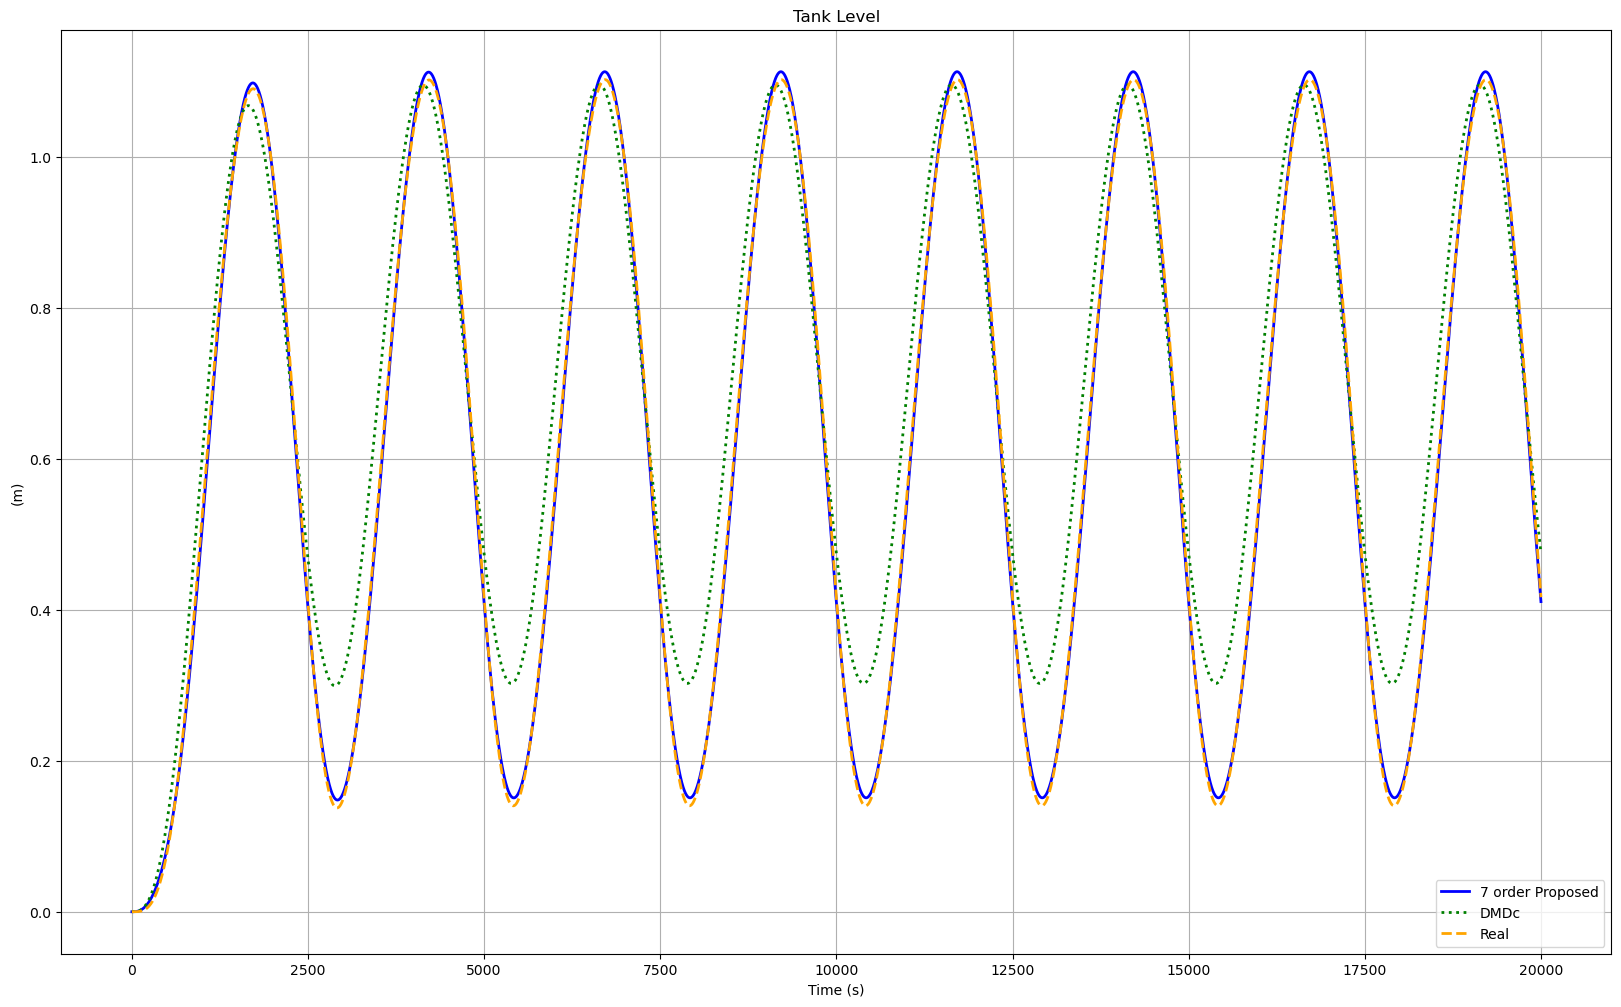

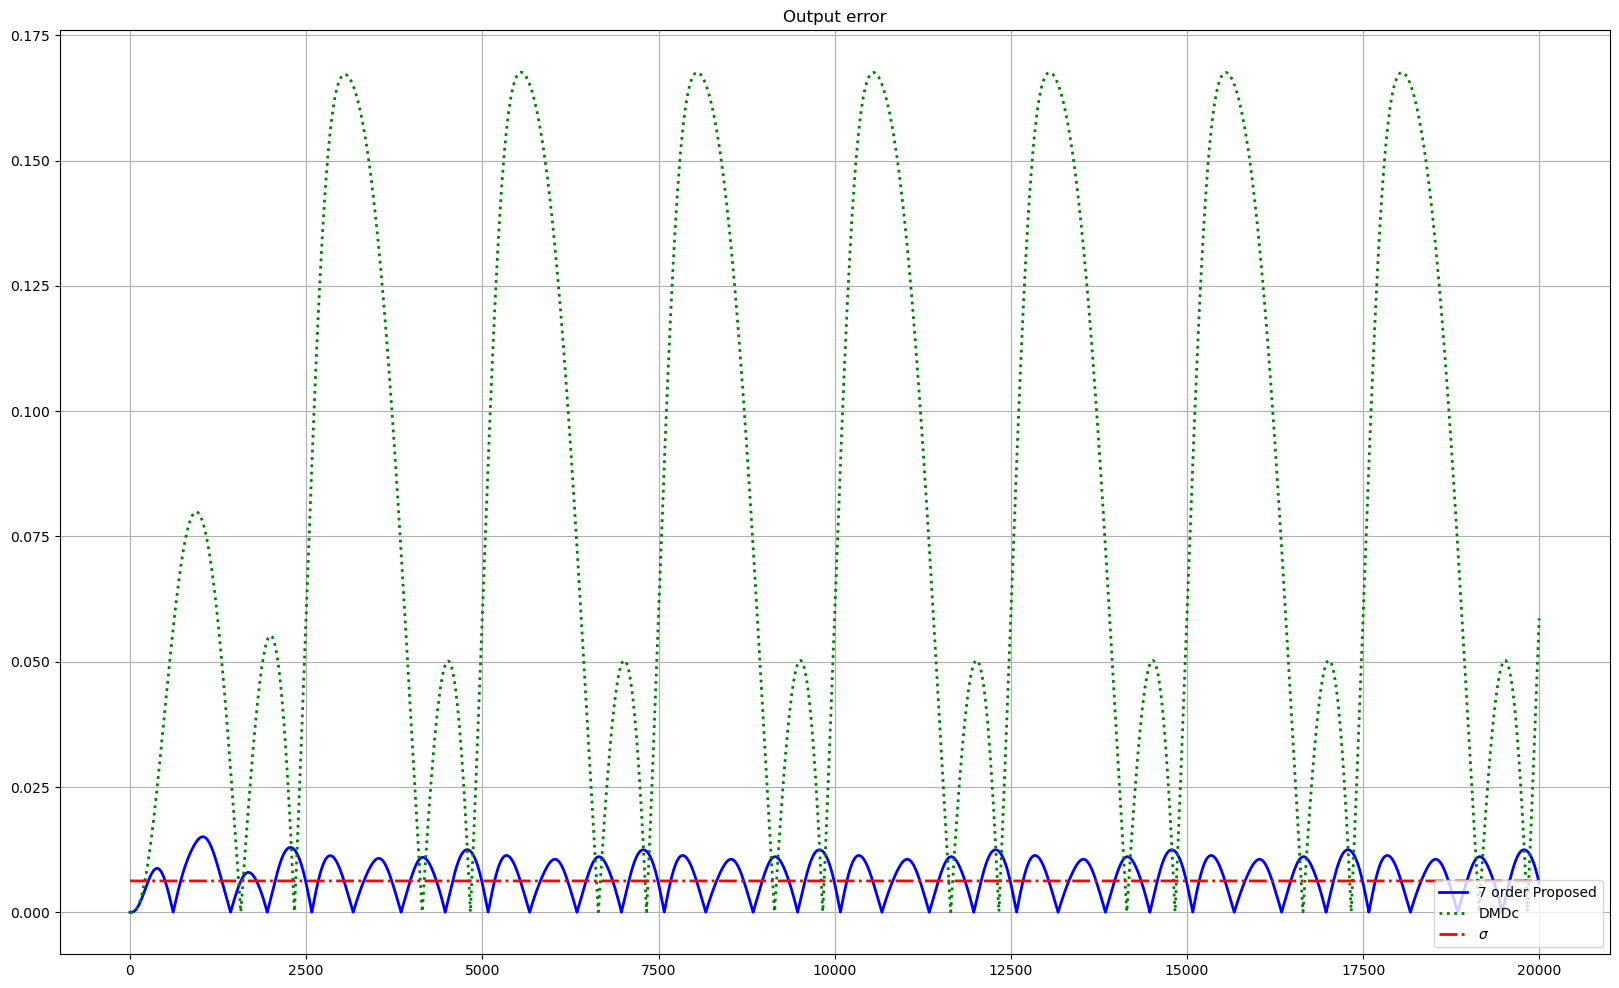

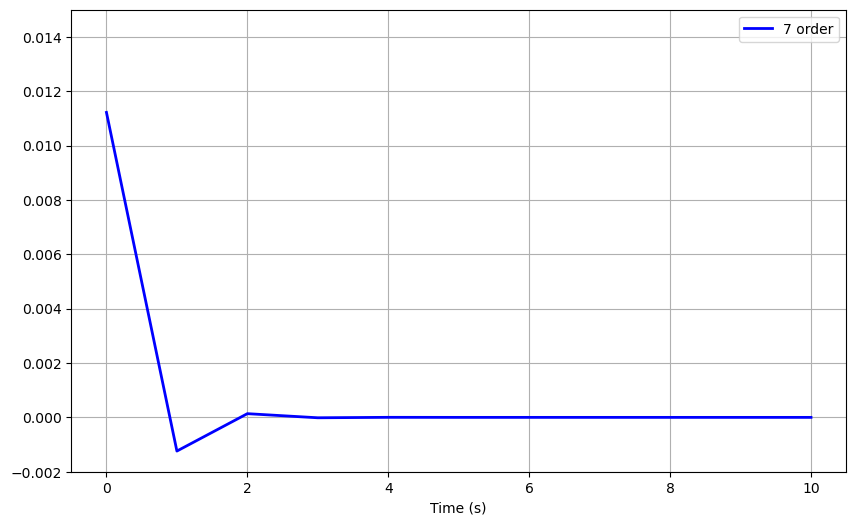

✅ Polynomial Module: Código executado (global/autoexecução)


In [9]:
# Import and run Polynomial module
polynomial_module = import_python_module('polynomial', polynomial_path)
if hasattr(polynomial_module, 'main'):
    polynomial_module.main()
elif hasattr(polynomial_module, '__file__'):
    print("✅ Polynomial Module: Código executado (global/autoexecução)")
else:
    print("⚠️ Polynomial Module: Função main() não encontrada")
    

6.260339973464763e-07


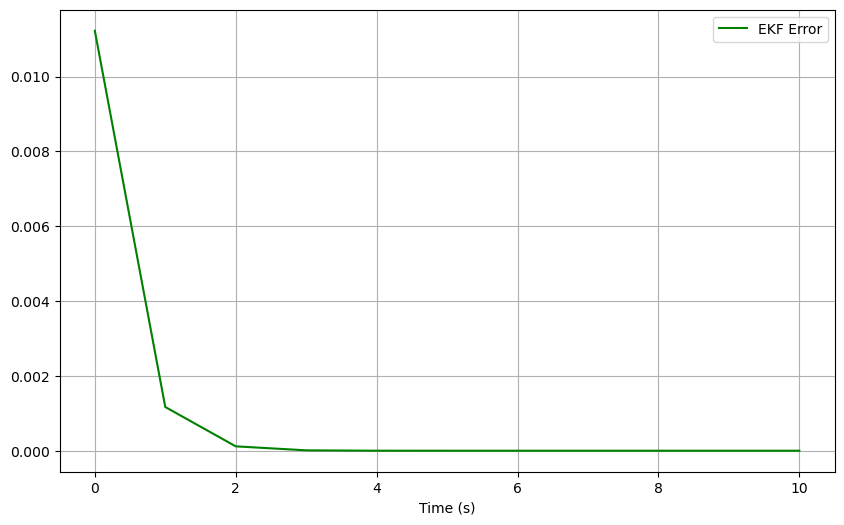

✅ Módulo executado (contém código global ou autoexecução)


In [26]:
 #Import and run EKF module
ekf_module = import_python_module('ekf', ekf_path)
if hasattr(ekf_module, 'main'):
    ekf_module.main()
elif hasattr(ekf_module, '__file__'):
    print("✅ Módulo executado (contém código global ou autoexecução)")
else:
    print("⚠️ Verifique: o módulo carregou mas não tem main() explícita")

# Working Example 2: Undamped pendulum system
<p style="font-size:16px">

The undamped pendulum serves as a fundamental exam- ple in classical mechanics, demonstrating the dynamics of
a simple mechanical system. Its behavior can be elucidated through rigorous mathematical analysis, beginning with the
derivation of its equations of motion from Newton’s laws of motion.
Consider a pendulum from the example 10 in [18] , it is consisting of a mass m = 1 kg attached to a rigid rod of length
l = 1 m, suspended in a gravitational field with acceleration g = 9.81 m/s2. In this analysis, we neglect damping effects,
implying that the damping coefficient b is assumed to be zero.
The equations of motion for the undamped pendulum are derived by applying Newton’s second law to the rotational
motion of the pendulum bob. Let x denote the angular dis placement of the pendulum from its equilibrium position, and
x2 = dx1/dt denote the angular velocity.
The state variables x1 and x2 are related by the following differential equations:

</p>

\begin{aligned}
\frac{dx_1}{dt} &= x_2 \\ 
\frac{dx_2}{dt} &= -\left(\frac{b}{m}\right) x_2 - \left(\frac{g}{l}\right) \sin(x_1) + u
\end{aligned}

<p style="font-size:16px">

Thus, the undamped pendulum is governed by a system of coupled first-order ordinary differential equations, describng the evolution of the angular displacement x1 and angular
velocity x2 over time.

</p>


#  Polynomial and EKF Model Execution
This section runs two modules:
1. **Polynomial Model** from `pendulum_polinomial_example.py`
2. **EKF (Extended Kalman Filter)** from `pendulum_EKF_example.py`

In [13]:
# Set absolute paths to module files
pdl_ekf_path = os.path.abspath('pendulum_EKF_example.py')
pdl_polynomial_path = os.path.abspath('pendulum_polinomial_example.py')


Installed SDP solvers:  ['MOSEK', 'CVXOPT', 'SCS']
Matrix([[coeff_0, coeff_1, coeff_2, coeff_3], [coeff_4, coeff_5, coeff_6, coeff_7], [coeff_8, coeff_9, coeff_10, coeff_11], [coeff_12, coeff_13, coeff_14, coeff_15]])
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+01  3e+00  3e+00  1e+00
 1:  0.0000e+00 -4.3805e-10  4e+00  1e+00  1e+00  3e-01
 2:  0.0000e+00 -6.9568e-10  9e-01  6e-01  2e-01  7e-02
 3:  0.0000e+00 -7.4141e-10  9e-02  9e-02  2e-02  7e-03
 4:  0.0000e+00 -7.1694e-10  6e-03  3e-02  2e-03  5e-04
 5:  0.0000e+00 -7.4838e-10  2e-04  1e-01  5e-05  1e-05
 6:  0.0000e+00 -6.7856e-10  5e-06  2e-02  1e-06  4e-07
 7:  0.0000e+00 -6.2166e-10  4e-07  8e-02  1e-07  3e-08
 8:  0.0000e+00 -9.0180e-10  4e-07  1e-01  7e-08  2e-08
 9:  0.0000e+00 -8.7090e-10  7e-08  8e-02  1e-08  3e-09
10:  0.0000e+00 -1.6585e-09  3e-08  8e-02  6e-09  2e-10
11:  0.0000e+00 -6.2874e-10  7e-09  3e-01  3e-09  1e-10
12:  0.0000e+00 -1.3161e-10  6e-10  3e-02  5e-10  7e-13


<IPython.core.display.Math object>

[[-1.36000000e-03 -8.00040510e+05 -1.27463942e+06 -9.89851383e+04]
 [ 8.00040510e+05 -1.37000000e-03  1.50661858e+05 -1.23716177e+05]
 [ 1.27463942e+06 -1.50661859e+05 -1.34000000e-03  1.73565903e+04]
 [ 9.89851383e+04  1.23716175e+05 -1.73565904e+04 -2.55000000e-03]]
Installed SDP solvers:  ['MOSEK', 'CVXOPT', 'SCS']
0.004135233763059836


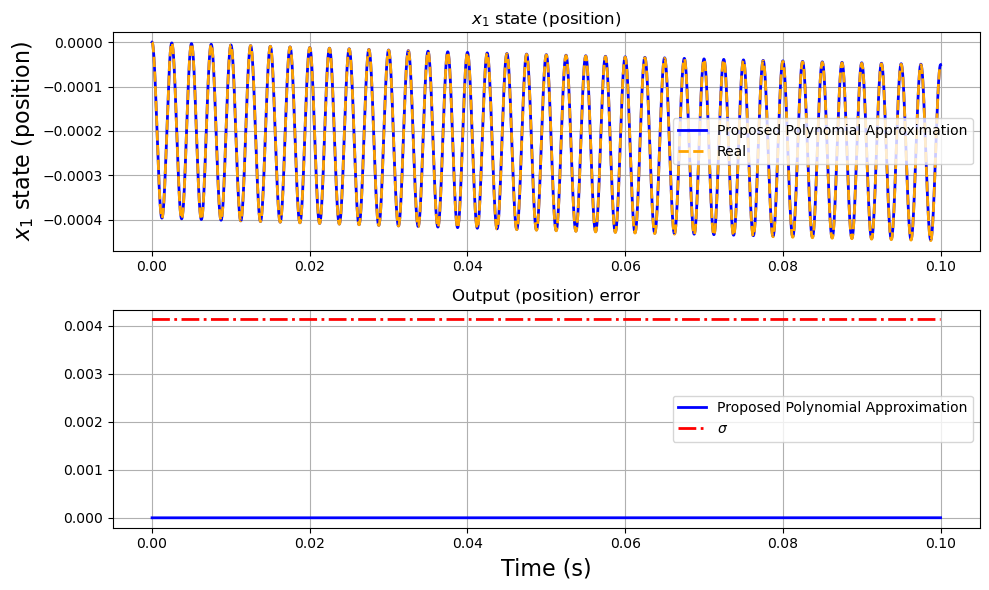

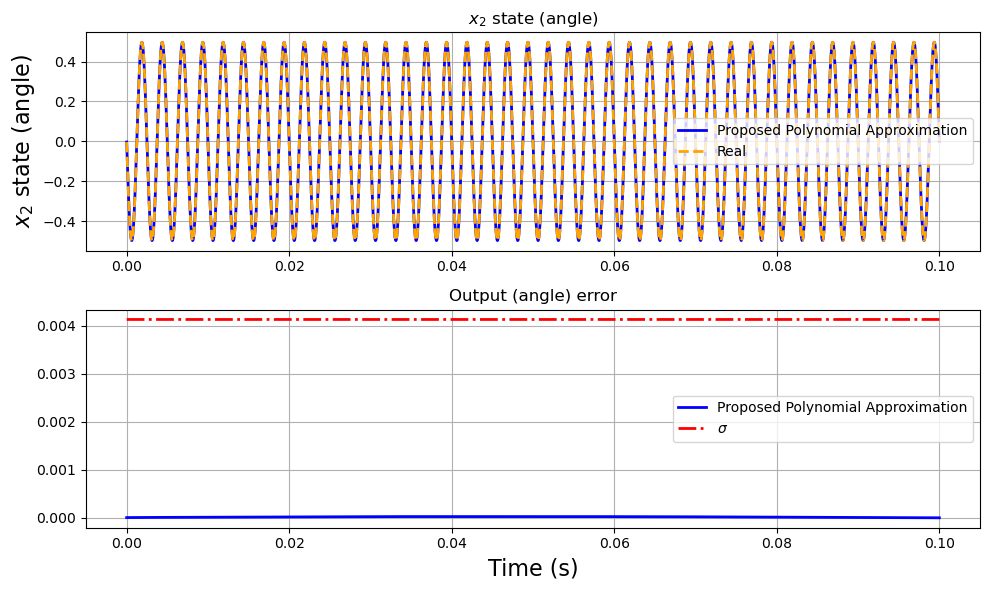

✅ Polynomial Module: Código executado (global/autoexecução)


In [14]:
# Import and run Polynomial module
pdl_polynomial_module = import_python_module('pdl_polynomial', pdl_polynomial_path)
if hasattr(pdl_polynomial_module, 'main'):
    pdl_polynomial_module.main()
elif hasattr(pdl_polynomial_module, '__file__'):
    print("✅ Polynomial Module: Código executado (global/autoexecução)")
else:
    print("⚠️ Polynomial Module: Função main() não encontrada")
    

(100001, 2)
(100001, 2)


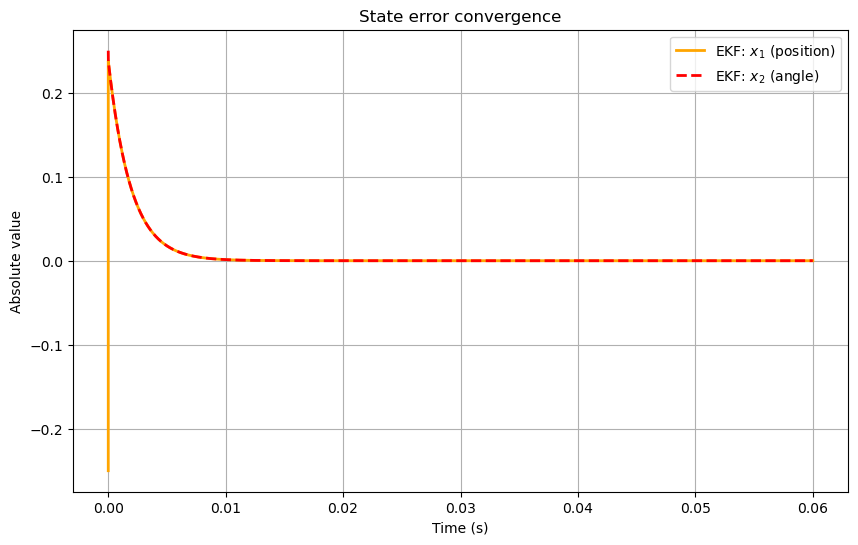

✅ Módulo executado (contém código global ou autoexecução)


In [15]:
 #Import and run EKF module
pdl_ekf_module = import_python_module('pdl_ekf', pdl_ekf_path)
if hasattr(pdl_ekf_module, 'main'):
    pdl_ekf_module.main()
elif hasattr(pdl_ekf_module, '__file__'):
    print("✅ Módulo executado (contém código global ou autoexecução)")
else:
    print("⚠️ Verifique: o módulo carregou mas não tem main() explícita")



### References

[8] De Persis, C., Tesi, P. "Formulas for data-driven control: Stabilization, optimality, and robustness". IEEE Transactions on Automatic Control, 65(3), 909-924, 2020.

[11] Guo, M., De Persis, C., Tesi, P., "Data-driven stabilization of nonlinear polynomial systems with noisy data". IEEE Transactions on Automatic Control, v. 67, n. 8, p. 4210–4217, 2022.

[12] Alessandro Luppi, Andrea Bisoffi, Claudio De Persis, Pietro Tesi. ``Data-driven design of safe control for polynomial systems''. European Journal of Control, vol. 75, pp. 100914, 2024, doi:10.1016/j.ejcon.2023.100914.